# Data Preprocessing & Feature Engineering

In this notebook, we:
- Scale and transform relevant features
- Handle class imbalance using SMOTE
- Split the data into training and testing sets

This step prepares the data for modeling.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the raw data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Feature Scaling

In [3]:
df_scaled = df.copy()

# Scale 'Amount' using RobustScaler (robust to outliers)
scaler = RobustScaler()
df_scaled['Amount'] = scaler.fit_transform(df_scaled['Amount'].values.reshape(-1, 1))

# Normalize 'Time' to 0–1 (optional but consistent)
df_scaled['Time'] = (df_scaled['Time'] - df_scaled['Time'].min()) / (df_scaled['Time'].max() - df_scaled['Time'].min())

We scale `Amount` using `RobustScaler` to handle outliers and normalize `Time` between 0 and 1 to make it easier for models to process.


## 2. Feature and Target Split

In [4]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

`X` contains the input features. `y` contains the binary target: 1 for fraud, 0 for non-fraud.

## 3. Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (199364, 30)
Test set: (85443, 30)


We use 70% of the data for training and 30% for testing. We stratify on `y` to preserve the original class distribution.

## 4. Class Imbalance: SMOTE

In [6]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After SMOTE - Class distribution in training set:")
print(pd.Series(y_train_smote).value_counts())

After SMOTE - Class distribution in training set:
Class
0    199020
1    199020
Name: count, dtype: int64


Since fraud is under 0.2% of all transactions, we apply SMOTE (Synthetic Minority Oversampling Technique) to create a balanced training set. This generates synthetic examples of the minority class to help the model learn from them.


## 5. Final Check

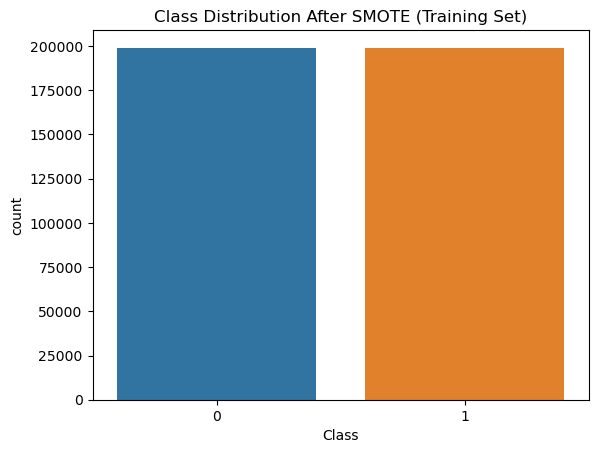

In [8]:
# Check class balance after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.show()

After applying SMOTE, the training data has balanced classes, which will help models learn more effectively.

## 6. Saving Processed Data

In [10]:
import joblib

# Save processed train/test sets
joblib.dump(X_train_smote, 'X_train_smote.pkl')
joblib.dump(y_train_smote, 'y_train_smote.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

We saved the scaled and balanced datasets as `.pkl` files in the project root directory. These will be loaded in the modeling notebooks to ensure consistent input across experiments.

## 6. Summary

We successfully:
- Scaled `Amount` and normalized `Time`
- Applied SMOTE to balance the training data
- Split the dataset into training and testing sets

The processed datasets have been saved and are ready for modeling in the next notebook.